In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import hydroeval as he
from functools import reduce
import datetime

from CompressedSensingInterpolator import CompresedSensingInterpolator
from InterpolateHelperFunctions import *

site_names_list = ['BEN', 'BLI', 'BSL', 'CLE', 'CRB', 'DAI', 'DFF', 'DFL', 'DFM', 'DFU', 'HCL', 'HCN', 'HCS', 'IND', 'LAK', 'LDF', 'MIT', 'NEB', 'PBC', 'SBL', 'SFL', 'SHE', 'SOL', 'STR', 'TCU', 'TIE', 'WAN']
all_pressure_df = pd.read_csv("all_pressure.csv")

In [10]:

site_names_list = ['BEN', 'BLI']
#iterate through each site
for site_id in site_names_list:
    print(f"Working on site: {site_id}")

    site_df = pd.DataFrame()
    site_df[["datetime","pressure_hobo"]] = all_pressure_df[["datetime",site_id]]
    site_df['datetime'] = pd.to_datetime(site_df['datetime'], format='%Y-%m-%d %H:%M:%S')
    site_df = site_df[site_df['pressure_hobo'].notna()]
    all_days = pd.date_range(site_df['datetime'].min(), site_df['datetime'].max(), freq='15min')
    all_days = pd.DataFrame(all_days, columns=["datetime"])
    site_df = all_days.merge(site_df, on='datetime', how='left')

    #down sampling to every 20th and interpolating
    filled_df = down_sample_and_interpolate_once(site_df,all_days,20,100,'pressure_hobo')
    
    #filling in the remaining gaps with a moving average
    #filled_df = sparse_joined_df
    #filled_df["pressure_combined_filled"] = filled_df["pressure_combined"].rolling(min_periods=1, center=True, window=1).mean()

    #dynamically save filled df for this speciifc site
    exec(f'{site_id}_filled_df = filled_df')

    

    

Working on site: BEN


creating design matrix: 100%|██████████| 2108/2108 [00:00<00:00, 15850.03it/s]


NAs per column:
datetime                    0.000000
index                       0.949983
pressure_filled             0.949983
pressure_hobo               0.406753
rolling_average             0.000000
pressure_combined           0.386407
pressure_combined_filled    0.000000
dtype: float64
Working on site: BLI


creating design matrix: 100%|██████████| 1486/1486 [00:00<00:00, 16553.14it/s]


NAs per column:
datetime                    0.000000
index                       0.947461
pressure_filled             0.947461
pressure_hobo               0.458002
rolling_average             0.000000
pressure_combined           0.435117
pressure_combined_filled    0.000000
dtype: float64


datetime                    0.000000
index                       0.947461
pressure_filled             0.947461
pressure_hobo               0.458002
rolling_average             0.000000
pressure_combined           0.435117
pressure_combined_filled    0.000000
dtype: float64


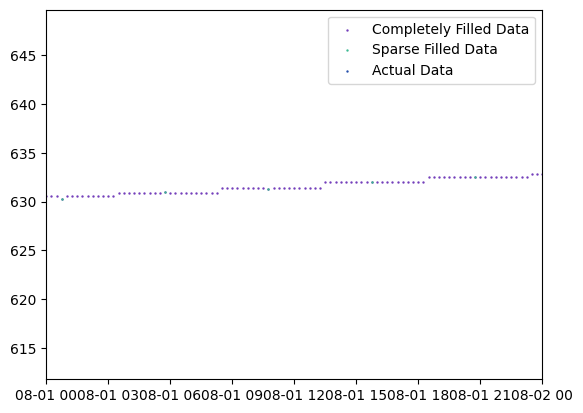

In [14]:

print(BLI_filled_df.isna().sum()/BLI_filled_df.shape[0])

plt.scatter(x = "datetime", y = "pressure_combined_filled",data=BLI_filled_df, label="Completely Filled Data", s = .5, color="#723cba")
plt.scatter(x = "datetime", y = "pressure_filled",data=BLI_filled_df, label="Sparse Filled Data", s = .5, color="#3bb892")
plt.scatter(x = "datetime", y = "pressure_hobo",data=BLI_filled_df, label="Actual Data", s = .5, color="#224dab")

left = datetime.date(2019, 8, 1)
right = datetime.date(2019, 8, 2)

# # Format the date into months & days
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %y')) 
# Changes x-axis range
plt.gca().set_xbound(left, right)
plt.legend()
plt.show()

In [24]:

#combining the filled pressure dataframes for each site into one dataframe
site_names_list = ['BEN', 'BLI', 'BSL', 'CLE', 'CRB', 'DAI', 'DFF', 'DFL', 'DFM', 'DFU', 'HCL', 'HCN', 'HCS', 'IND', 'LAK', 'LDF', 'MIT', 'NEB', 'PBC', 'SBL', 'SFL', 'SHE', 'SOL', 'STR', 'TCU', 'TIE']

site_DF_list = []

for site_id in site_names_list:
    print(f"Adding site: {site_id}")
    #adding to the list
    exec(f"site_DF_list.append({site_id}_filled_df[['datetime','pressure_combined_filled']])") 

#merging into one dataframe
#filledPressDF = reduce(lambda  left,right: pd.merge(left,right,on=['datetime'],
                                            how='outer',suffixes=(None,site_id)), site_DF_list)


#exporting csv
#filledPressDF.to_csv("filled_all_pressure.csv")

Adding site: BEN
Adding site: BLI
Adding site: BSL
Adding site: CLE
Adding site: CRB
Adding site: DAI
Adding site: DFF
Adding site: DFL
Adding site: DFM
Adding site: DFU
Adding site: HCL
Adding site: HCN
Adding site: HCS
Adding site: IND
Adding site: LAK
Adding site: LDF
Adding site: MIT
Adding site: NEB
Adding site: PBC
Adding site: SBL
Adding site: SFL
Adding site: SHE
Adding site: SOL
Adding site: STR
Adding site: TCU
Adding site: TIE


MemoryError: Unable to allocate 389. MiB for an array with shape (1, 51048311) and data type float64

In [28]:
BEN_filled_df["rolling_average"] = np.nan
BEN_filled_df

,datetime,index,pressure_filled,pressure_hobo,pressure_combined,pressure_combined_filled,rolling_average
0,2020-05-11 16:00:00,0.0,618.87,618.870000,618.870000,618.870000,NaN
1,2020-05-11 16:15:00,NaN,NaN,618.730000,618.730000,618.730000,NaN
2,2020-05-11 16:30:00,NaN,NaN,618.730000,618.730000,618.730000,NaN
3,2020-05-11 16:45:00,NaN,NaN,618.790000,618.790000,618.790000,NaN
4,2020-05-11 17:00:00,NaN,NaN,618.500000,618.500000,618.500000,NaN
...,...,...,...,...,...,...,...
84287,2022-10-06 15:15:00,NaN,NaN,631.957300,631.957300,631.957300,NaN
84288,2022-10-06 15:30:00,NaN,NaN,631.869385,631.869385,631.869385,NaN
84289,2022-10-06 15:45:00,NaN,NaN,631.776298,631.776298,631.776298,NaN
84290,2022-10-06 16:00:00,NaN,NaN,632.138303,632.138303,632.138303,NaN
